In [911]:
%matplotlib inline
import numpy as np
import seaborn as sns


ImportError: No module named plt

In [883]:
def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k', color="red")

In [887]:
def drawLine(x,y,xlims,plt):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k', color="red")

In [884]:
X = [[2,1,1],
     [1,20,1],
     [1,5,1],
     [4,1,1],
     [1,40,1],
     [3,30,1]
    ]

X = np.array(X,dtype=float)
y = np.array([-1,-1,-1,1,1,1])


In [888]:
x_i = []
y_i = []

In [889]:
theta = np.zeros(X.shape[1])
eta = .01 * np.ones(X.shape[1])
grad_1 = np.zeros(X.shape[1])
grad_2 = np.zeros(X.shape[1])

for i in xrange(1000):
    delta_theta = X.T.dot(y * 1.0 / (1 + np.exp(y * X.dot(theta))))
    grad_1 = grad_2
    grad_2 = delta_theta
    index1 = grad_1*grad_2 > 0
    index2 = grad_1*grad_2 <= 0
    eta[index1] += .01
    eta[index2] *= .95
    old_theta = theta.copy()
    theta += eta * delta_theta
    if i % 100 == 0:
            x_i.append(-theta[2] / theta[0])
            y_i.append(-theta[2] / theta[1])
    loss = np.log(1 + np.exp(-y * X.dot(theta))).sum()
    if np.sqrt(((theta-old_theta)**2).sum()) < 1e-4 and i> 5:
        break
print "Loss = %s in %s iterations" % (loss,i)
#     print theta

Loss = 5.37705899763e-05 in 999 iterations


In [886]:
X.dot(theta)

array([-25.18694388, -12.21950711, -36.31773936,   9.92703761,
        19.91146922,  38.95996254])

In [893]:
x_i = x_i[1:]
y_i = y_i[1:]

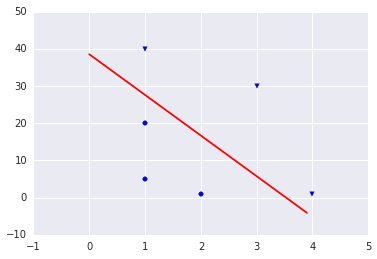

In [871]:
x_i = -theta[2] / theta[0]
y_i = -theta[2] / theta[1]
sns.plt.scatter(X[:3,0], X[:3,1], marker=u'o')
sns.plt.scatter(X[3:,0], X[3:,1], marker=u'v')
drawLine2P([x_i,0],[0,y_i],[0,4])

### Doing multiple plotting

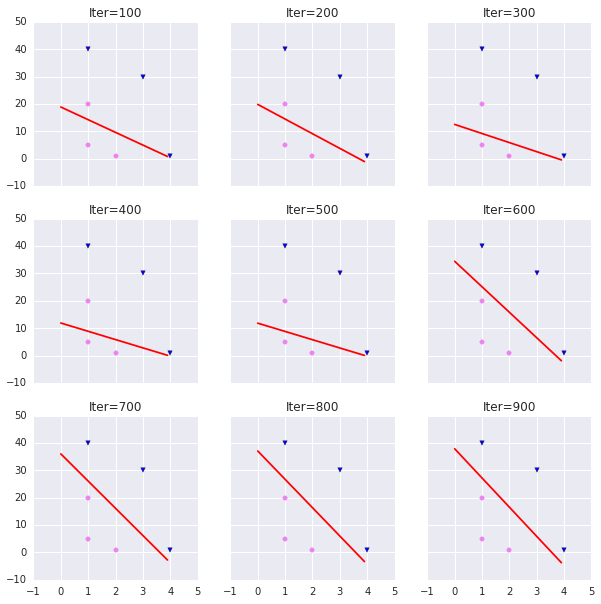

In [930]:

f, plots = sns.plt.subplots(3, 3, sharex='col', sharey='row', figsize=(10,10))
plots= plots.flatten()
for i in xrange(9):
    plots[i].scatter(X[:3,0], X[:3,1], marker=u'o', color="violet")
    plots[i].scatter(X[3:,0], X[3:,1], marker=u'v')
    drawLine([x_i[i],0],[0,y_i[i]],[0,4],plots[i])
    title = 'Iter=%s' % ((i+1)*100)
    plots[i].set_title(title)
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

### Scale the features now

In [872]:
X[:,1] /= 10.0

In [873]:
theta = np.zeros(X.shape[1])

eta = .01 * np.ones(X.shape[1])
grad_1 = np.zeros(X.shape[1])
grad_2 = np.zeros(X.shape[1])

for i in xrange(1000):
    delta_theta = X.T.dot(y * 1.0 / (1 + np.exp(y * X.dot(theta))))
    grad_1 = grad_2
    grad_2 = delta_theta
    index1 = grad_1*grad_2 > 0
    index2 = grad_1*grad_2 <= 0
    eta[index1] += .01
    eta[index2] *= .95
    old_theta = theta.copy()
    theta += eta * delta_theta
    loss = np.log(1 + np.exp(-y * X.dot(theta))).sum()
    if np.sqrt(((theta-old_theta)**2).sum()) < 1e-4 and i> 5:
        break
print "Loss = %s in %s iterations" % (loss,i)
#     print theta

Loss = 0.00408487946169 in 999 iterations


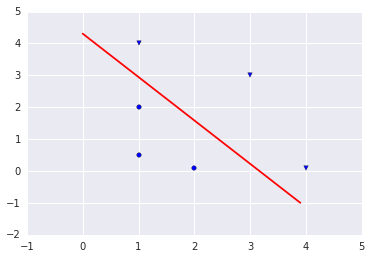

In [874]:
x_i = -theta[2] / theta[0]
y_i = -theta[2] / theta[1]
sns.plt.scatter(X[:3,0], X[:3,1], marker=u'o')
sns.plt.scatter(X[3:,0], X[3:,1], marker=u'v')
drawLine2P([x_i,0],[0,y_i],[0,4])

### Generating data now

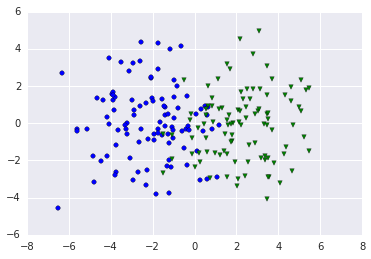

In [875]:
mean = [-2,0]
cov = [[3,0], [0,3]]
points1 = np.random.multivariate_normal(mean, cov, 100)

mean = [2,0]
cov = [[3,0], [0,3]]
points2 = np.random.multivariate_normal(mean, cov, 100)

sns.plt.scatter(points1[:,0], points1[:,1],c="blue")
sns.plt.scatter(points2[:,0], points2[:,1],c="green",marker="v")

In [876]:
X = np.append(points1, points2, axis = 0)
X = np.append(X, np.ones((200,1)), axis = 1)
y = np.append(np.ones(100), -1*np.ones(100))

In [877]:
theta = np.zeros(X.shape[1])

eta = .01 * np.ones(X.shape[1])
grad_1 = np.zeros(X.shape[1])
grad_2 = np.zeros(X.shape[1])

for i in xrange(1000):
    delta_theta = X.T.dot(y * 1.0 / (1 + np.exp(y * X.dot(theta))))
    grad_1 = grad_2
    grad_2 = delta_theta
    index1 = grad_1*grad_2 > 0
    index2 = grad_1*grad_2 <= 0
    eta[index1] += .01
    eta[index2] *= .95
    old_theta = theta.copy()
    theta += eta * delta_theta
    loss = np.log(1 + np.exp(-y * X.dot(theta))).sum()
    if np.sqrt(((theta-old_theta)**2).sum()) < 1e-4 and i> 5:
        break
print "Loss = %s in %s iterations" % (loss,i)
#     print theta

Loss = 43.2745276848 in 10 iterations


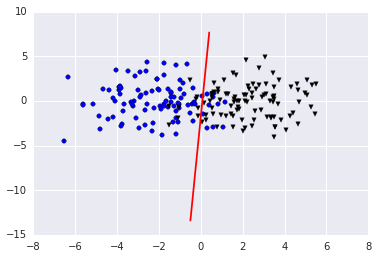

In [881]:
x_i = -theta[2] / theta[0]
y_i = -theta[2] / theta[1]
sns.plt.scatter(X[:100,0], X[:100,1], marker=u'o')
sns.plt.scatter(X[100:,0], X[100:,1], marker=u'v',color="black")
drawLine2P([x_i,0],[0,y_i],[-.5,.5])